### Imports & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
white_wine_no_out = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\white_wine_no_out.csv", sep=',')
white_wine_no_out_tsd = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\white_wine_no_out_tsd.csv", sep=',')

In [23]:
# balance the dataset
# feature selection: analyze the impact of the features
# optimize the classification models through hyperparameter tuning
# model and evaluate the approaches

### Split Data


In [21]:
white_wine_no_out_tsd1 = white_wine_no_out_tsd.drop(['quality', 'type'], axis=1)

In [23]:
# Split data into X and Y
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Model Results

Unique class labels in y: [0 1 2]


C:\Users\janin\AppData\Local\Temp\ipykernel_26772\1927202666.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=white_wine_no_out_tsd, x='quality', ax=axes[0], palette='Greens').set_title("Class Distribution Before SMOTE", fontsize=12)
C:\Users\janin\AppData\Local\Temp\ipykernel_26772\1927202666.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(y_train, bins=np.arange(2.5, 9.5, 0.5), ax=axes[1], palette =palette).set_title("Train Set Class Distribution Before SMOTE", fontsize=12)
C:\Users\janin\AppData\Local\Temp\ipykernel_26772\1927202666.py:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(y_train_resampled, bins=np.arange(2.5, 9.5, 0.5), ax=axes[2], palette=palette).set_title("Train Set Class Distribution After SMOTE", fontsize=12)


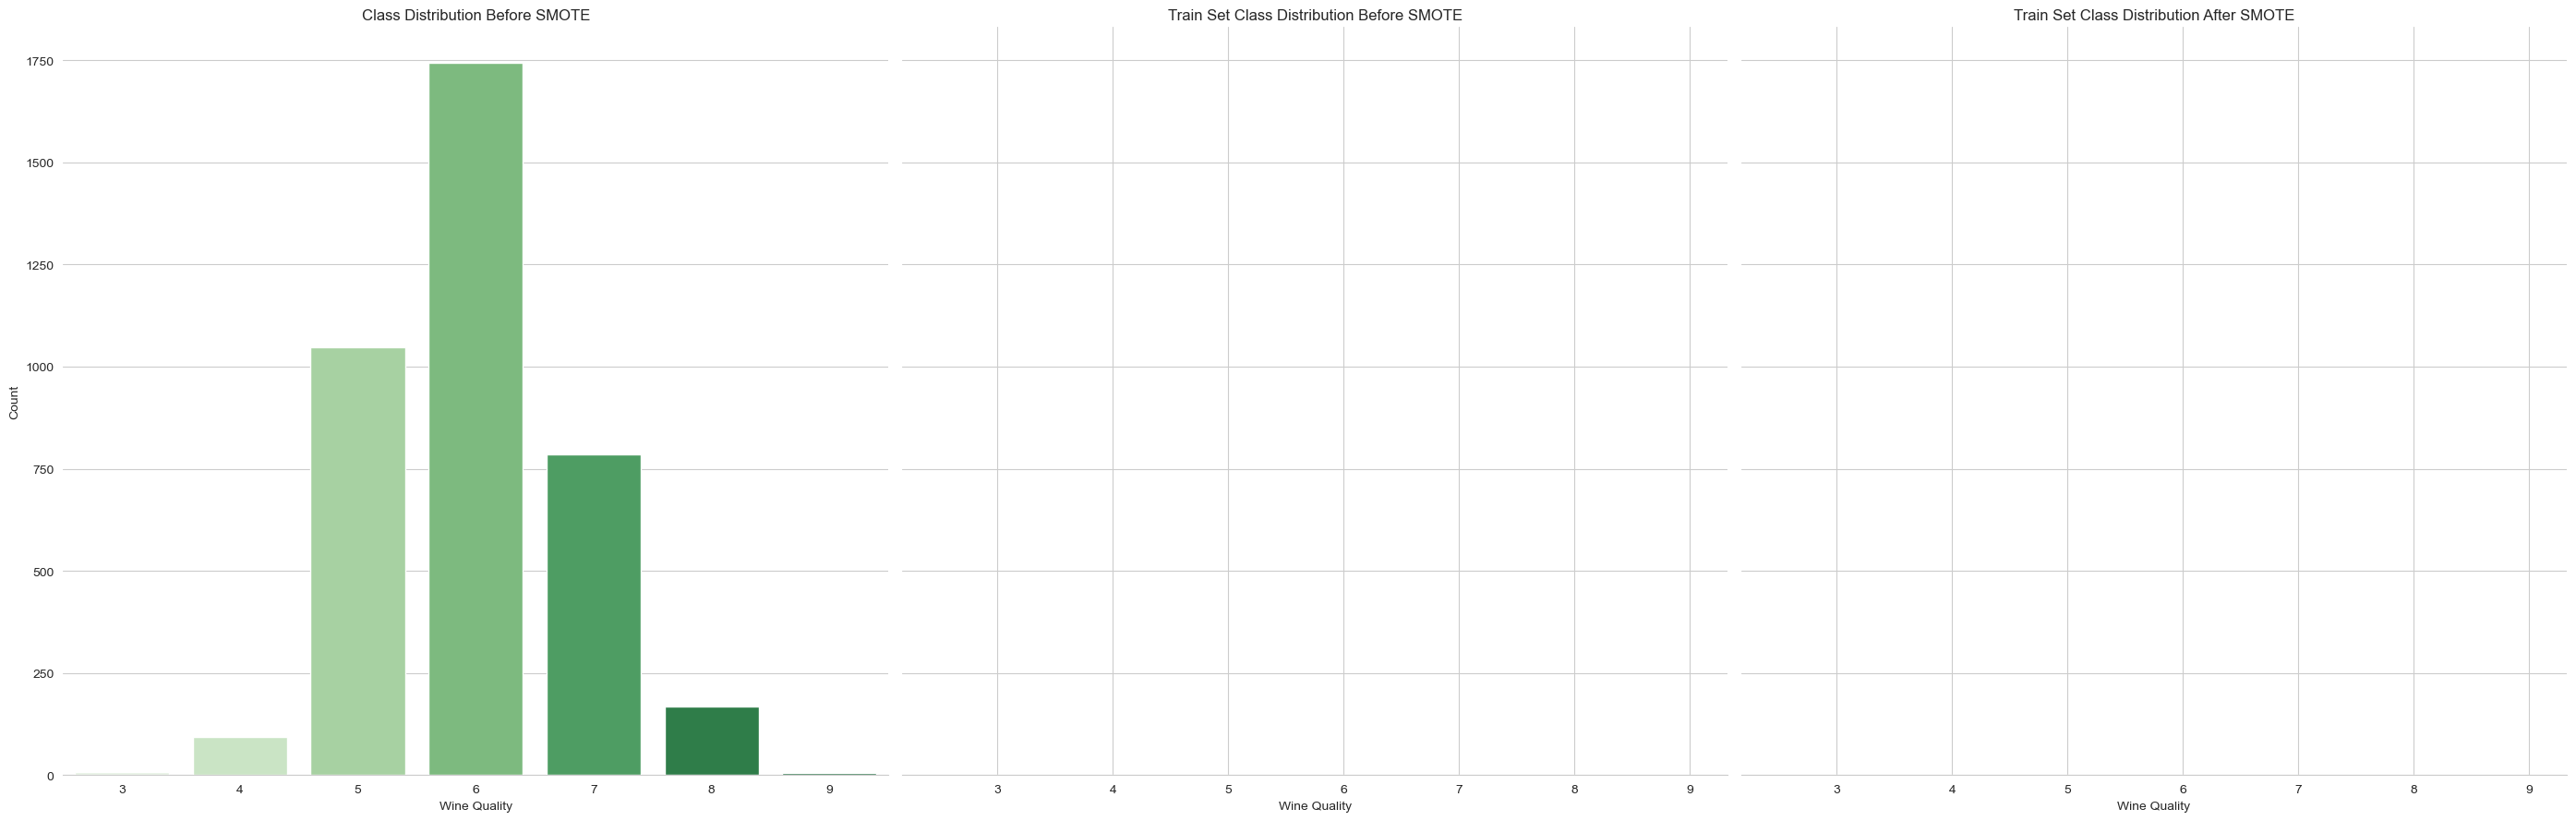

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

# Assuming `white_wine_no_out_tsd1` is already loaded in a pandas DataFrame.
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

### 1. Balance Data Using SMOTE ###
# Split into train-test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Custom color palette for classes 3, 4, 5 (lightgreen), 6, 7 (forestgreen), and 8, 9 (darkgreen)
# If there are more quality classes, ensure they're covered in this palette.
palette = ['lightgreen', 'forestgreen', 'darkgreen']
palette1 = {0: 'lightgreen', 1: 'lightgreen', 2: 'lightgreen', 3: 'lightgreen', 4: 'lightgreen', 5: 'lightgreen', 
           6: 'forestgreen', 7: 'forestgreen', 
           8: 'darkgreen', 9: 'darkgreen'}

# Check the unique class labels in y
print("Unique class labels in y:", y.unique())

# Visualizing class distribution before and after SMOTE
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 9), sharey=True)

# Plot 1: Class Distribution Before SMOTE
sns.countplot(data=white_wine_no_out_tsd, x='quality', ax=axes[0], palette='Greens').set_title("Class Distribution Before SMOTE", fontsize=12)

# Plot 2: Train set distribution before SMOTE with narrower bins
sns.histplot(y_train, bins=np.arange(2.5, 9.5, 0.5), ax=axes[1], palette =palette).set_title("Train Set Class Distribution Before SMOTE", fontsize=12)

# Plot 3: Train set distribution after SMOTE with narrower bins
sns.histplot(y_train_resampled, bins=np.arange(2.5, 9.5, 0.5), ax=axes[2], palette=palette).set_title("Train Set Class Distribution After SMOTE", fontsize=12)

# Customizing plot appearance
for ax in axes:
    sns.despine(ax=ax, top=True, right=True, left=True)
    ax.set_xlabel('Wine Quality')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\janin\AppData\Local\Temp\ipykernel_26772\1232051682.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=white_wine_no_out_tsd, x='quality', ax=axes[0], palette='Greens').set_title("Class Distribution Before SMOTE", fontsize=12)
C:\Users\janin\AppData\Local\Temp\ipykernel_26772\1232051682.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[1], palette=palette).set_title("Class Distribution Before SMOTE", fontsize=12)
C:\Users\janin\AppData\Local\Temp\ipykernel_26772\1232051682.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

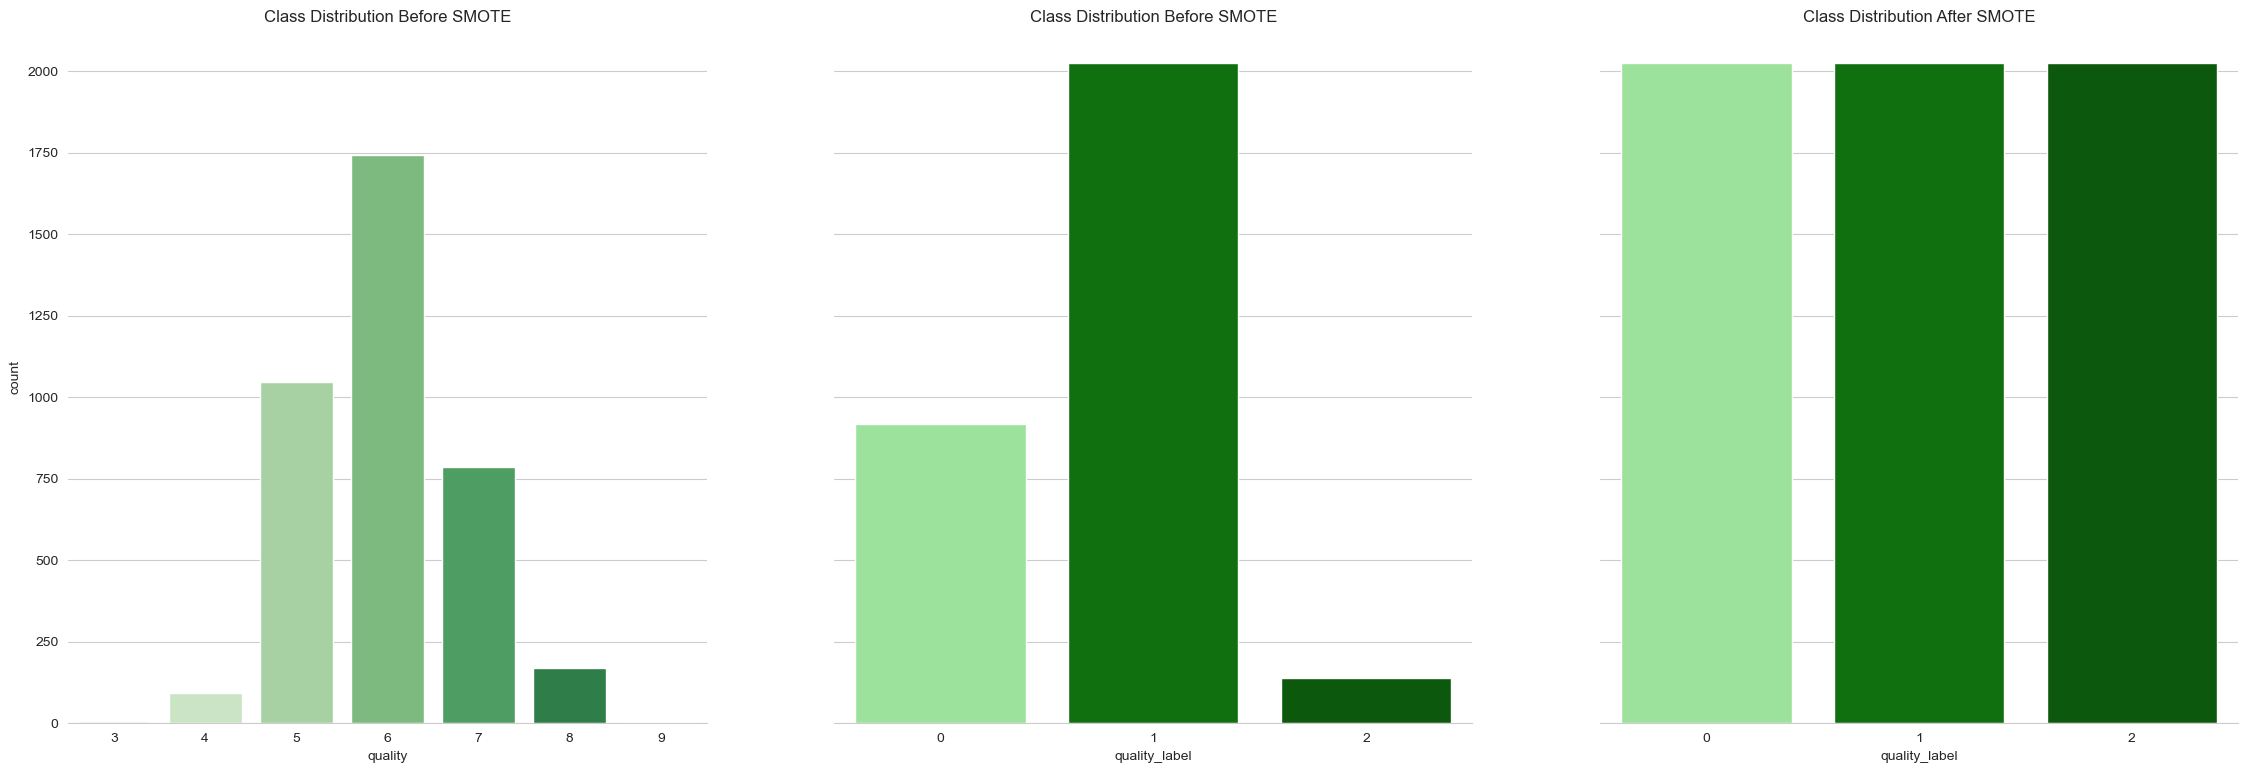

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.set_style("whitegrid")

# Sample data loading (modify as needed)
# white_wine_no_out_tsd1 = pd.read_csv('path/to/white_wine_no_out_tsd1.csv')
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

### 1. Balance Data Using SMOTE ###
# Split into train-test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualizing class distribution before SMOTE
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 9), sharey=True)
palette = ['lightgreen','green','darkgreen']

#plt.figure(figsize=(6, 4))
sns.countplot(data=white_wine_no_out_tsd, x='quality', ax=axes[0], palette='Greens').set_title("Class Distribution Before SMOTE", fontsize=12)
sns.countplot(x=y_train, ax=axes[1], palette=palette).set_title("Class Distribution Before SMOTE", fontsize=12)
sns.countplot(x=y_train_resampled, ax=axes[2], palette=palette).set_title("Class Distribution After SMOTE", fontsize=12)

sns.despine(ax=axes[0], top=True, right=True, left=True)
sns.despine(ax=axes[1], top=True, right=True, left=True)  # Remove top and rig
sns.despine(ax=axes[2], top=True, right=True, left=True)  # Remove top and rig


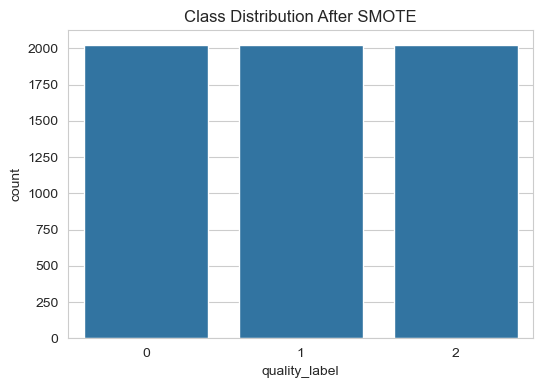

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters for ANN: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
ANN Best Accuracy: 0.7523
Classification Report for ANN:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       230
           1       0.82      0.80      0.81       506
           2       0.39      0.54      0.45        35

    accuracy                           0.75       771
   macro avg       0.63      0.67      0.65       771
weighted avg       0.76      0.75      0.76       771



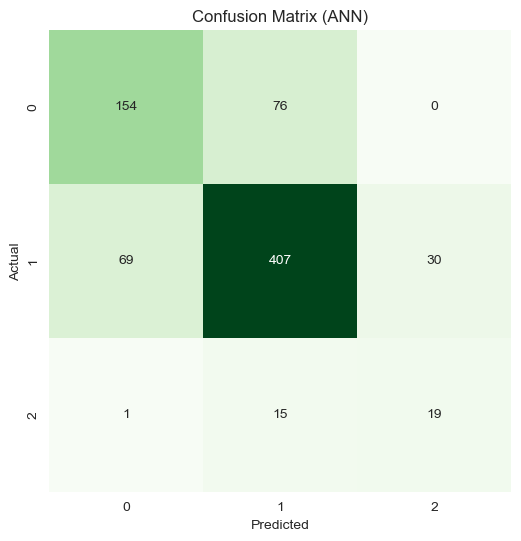

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# Step 2: Standardization (Feature Scaling)
# Feature scaling is important for ANN models
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Step 3: Hyperparameter Tuning for ANN
# Define the parameter grid for ANN
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Varying number of hidden layers and neurons
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'solver': ['adam', 'sgd'],  # Different solvers for optimization
    'learning_rate': ['constant', 'adaptive'],  # Different learning rate schedules
    'max_iter': [200, 500]  # Number of iterations (epochs)
}

# Initialize the ANN model (MLPClassifier)
ann = MLPClassifier(random_state=42)

# Tune the ANN model using GridSearchCV
grid_search = GridSearchCV(ann, param_grid_ann, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled_scaled, y_train_resampled)

# Best model and parameters
best_ann = grid_search.best_estimator_
print("Best Parameters for ANN:", grid_search.best_params_)

# Step 4: Model Evaluation

# Evaluate the best model on the test set
y_pred = best_ann.predict(x_test_scaled)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Best Accuracy: {accuracy:.4f}")
print("Classification Report for ANN:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", square=True, cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (ANN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\janin\AppData\Local\Temp\ipykernel_26772\1622468531.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens_r')


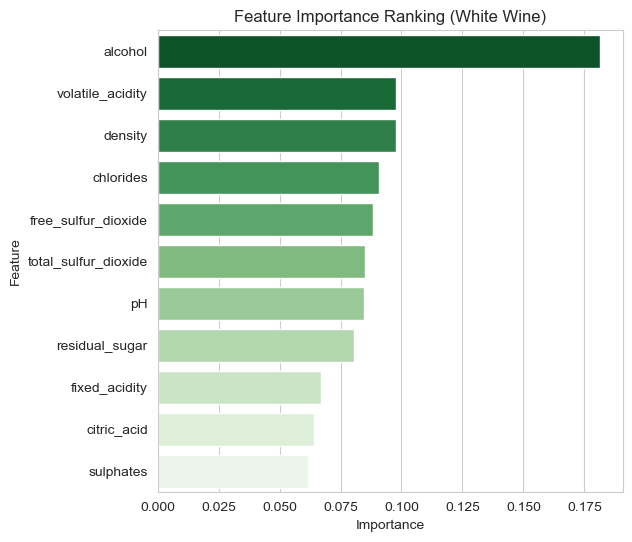

Best RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8249
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       230
           1       0.85      0.89      0.87       506
           2       0.67      0.57      0.62        35

    accuracy                           0.82       771
   macro avg       0.77      0.73      0.74       771
weighted avg       0.82      0.82      0.82       771



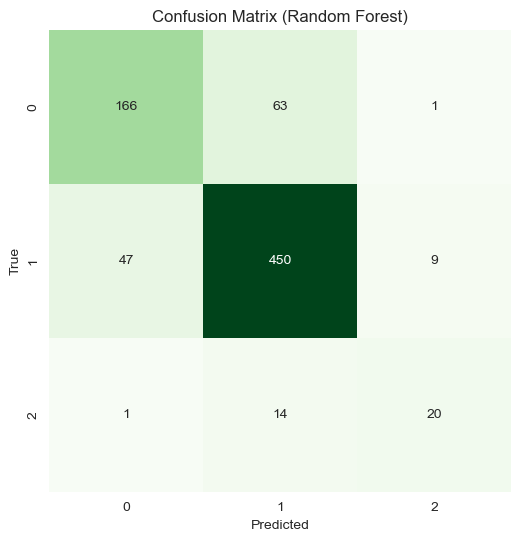

Best SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7004
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       230
           1       0.81      0.72      0.76       506
           2       0.25      0.49      0.33        35

    accuracy                           0.70       771
   macro avg       0.56      0.63      0.58       771
weighted avg       0.73      0.70      0.71       771



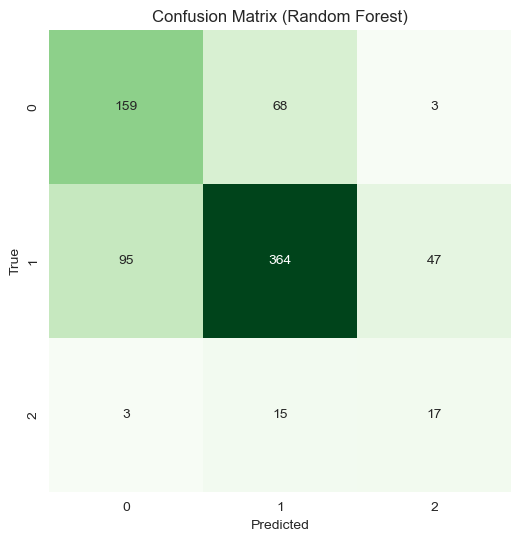

Best ANN: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Accuracy: 0.7315
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       230
           1       0.83      0.76      0.79       506
           2       0.33      0.60      0.42        35

    accuracy                           0.73       771
   macro avg       0.60      0.68      0.63       771
weighted avg       0.75      0.73      0.74       771



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


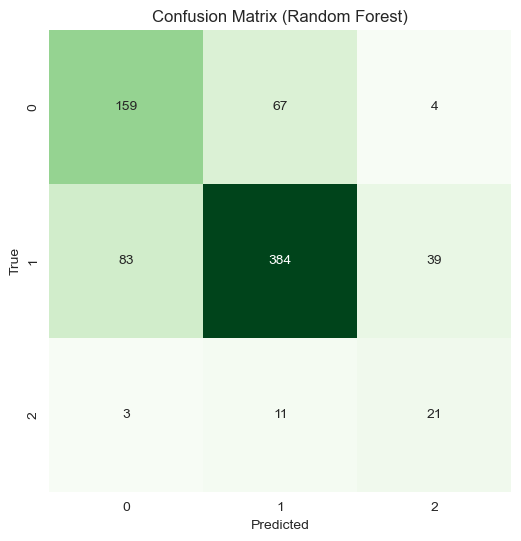

ValueError: Length of values (33) does not match length of index (11)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# Step 2: Feature Selection using RandomForest for initial feature ranking
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)

# Rank feature importance
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for RandomForest
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens_r')
plt.title('Feature Importance Ranking (White Wine)')
plt.show()

# Step 3: Standardization
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Step 4: Hyperparameter Tuning and Model Training

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize models
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'SVM': (SVC(random_state=42), param_grid_svc),
    'ANN': (MLPClassifier(random_state=42), param_grid_ann)
}

# Tune and evaluate each model using GridSearchCV
best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_resampled_scaled, y_train_resampled)
    best_models[model_name] = grid_search.best_estimator_
    
    # Predictions and evaluation
    preds = best_models[model_name].predict(x_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    results[model_name] = accuracy
    
    print(f"Best {model_name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, preds))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
    plt.title(f'Confusion Matrix (Random Forest)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 5: Feature Impact on Model Performance

# Initialize a DataFrame to hold the feature impact results
feature_impact_df = pd.DataFrame(index=X.columns)

# Collect feature importance for RandomForest
feature_impact_df['RandomForest'] = rf.feature_importances_

# For SVM, we can use the absolute values of the coefficients if using a linear kernel
svc_linear = SVC(kernel='linear').fit(x_train_resampled_scaled, y_train_resampled)
feature_impact_df['SVM'] = np.abs(svc_linear.coef_).flatten()

# For ANN, we do not directly have feature importance, but we can use permutation importance
# from sklearn.inspection import permutation_importance is an option if required for ANN.
# For simplicity, we'll leave ANN without feature-specific ranking.

# Normalizing the results for visualization (0 to 1 range)
feature_impact_df = feature_impact_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Plot the performance results for each model against the features
plt.figure(figsize=(12, 6))
for col in feature_impact_df.columns:
    plt.plot(feature_impact_df.index, feature_impact_df[col], marker='o', label=f'{col}-Test')
    
plt.title('Performance Analysis of Features on Different Models')
plt.xlabel('Features')
plt.ylabel('Performance result (in 0-1 range)')
plt.xticks(rotation=45)
plt.legend(title='Keys')
plt.grid(True)
plt.show()



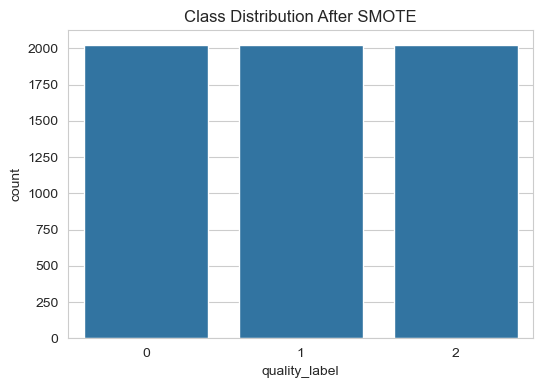

Selected Features for SVM: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')
Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Best Accuracy: 0.7056
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66       230
           1       0.83      0.71      0.77       506
           2       0.27      0.54      0.36        35

    accuracy                           0.71       771
   macro avg       0.57      0.66      0.60       771
weighted avg       0.74      0.71      0.72       771

Confusion Matrix for SVM:
 [[164  63   3]
 [ 96 361  49]
 [  4  12  19]]


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

# Load the dataset
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# Step 2: Feature Selection using RFE with SVM
# Use linear kernel for feature ranking
svc_linear = SVC(kernel="linear", random_state=42)

# Recursive Feature Elimination (RFE) to select the best features for SVM
selector = RFE(estimator=svc_linear, n_features_to_select=10, step=1)  # Select top 10 features
selector = selector.fit(x_train_resampled, y_train_resampled)

# Get the selected features
selected_features = X.columns[selector.support_]

print("Selected Features for SVM:", selected_features)

# Use only the selected features for training and testing
x_train_resampled_selected = selector.transform(x_train_resampled)
x_test_selected = selector.transform(x_test)

# Step 3: Standardization
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled_selected)
x_test_scaled = scaler.transform(x_test_selected)

# Step 4: Hyperparameter Tuning for SVM

# Define the parameter grid for SVM
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM model
svc = SVC(random_state=42)

# Tune SVM using GridSearchCV
grid_search = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled_scaled, y_train_resampled)

# Best model and parameters
best_svm = grid_search.best_estimator_
print("Best Parameters for SVM:", grid_search.best_params_)

# Step 5: Model Evaluation

# Evaluate the best model on the test set
y_pred = best_svm.predict(x_test_scaled)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Best Accuracy: {accuracy:.4f}")
print("Classification Report for SVM:\n", classification_report(y_test, y_pred))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred))


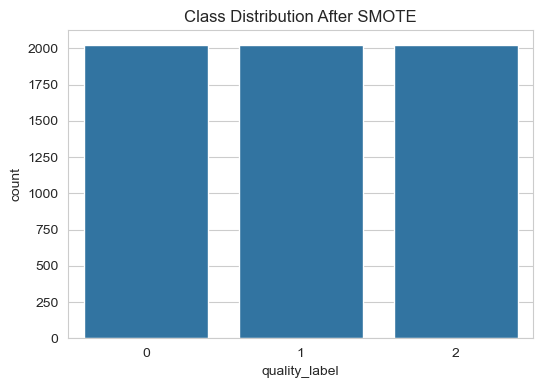

Selected Features for SVM: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')
Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Best Accuracy: 0.7056
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66       230
           1       0.83      0.71      0.77       506
           2       0.27      0.54      0.36        35

    accuracy                           0.71       771
   macro avg       0.57      0.66      0.60       771
weighted avg       0.74      0.71      0.72       771



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

# Load the dataset
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# Step 2: Feature Selection using RFE with SVM
# Use linear kernel for feature ranking
svc_linear = SVC(kernel="linear", random_state=42)

# Recursive Feature Elimination (RFE) to select the best features for SVM
selector = RFE(estimator=svc_linear, n_features_to_select=10, step=1)  # Select top 10 features
selector = selector.fit(x_train_resampled, y_train_resampled)

# Get the selected features
selected_features = X.columns[selector.support_]

print("Selected Features for SVM:", selected_features)

# Use only the selected features for training and testing
x_train_resampled_selected = selector.transform(x_train_resampled)
x_test_selected = selector.transform(x_test)

# Step 3: Standardization
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled_selected)
x_test_scaled = scaler.transform(x_test_selected)

# Step 4: Hyperparameter Tuning for SVM

# Define the parameter grid for SVM
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM model
svc = SVC(random_state=42)

# Tune SVM using GridSearchCV
grid_search = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled_scaled, y_train_resampled)

# Best model and parameters
best_svm = grid_search.best_estimator_
print("Best Parameters for SVM:", grid_search.best_params_)

# Step 5: Model Evaluation

# Evaluate the best model on the test set
y_pred = best_svm.predict(x_test_scaled)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Best Accuracy: {accuracy:.4f}")
print("Classification Report for SVM:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot


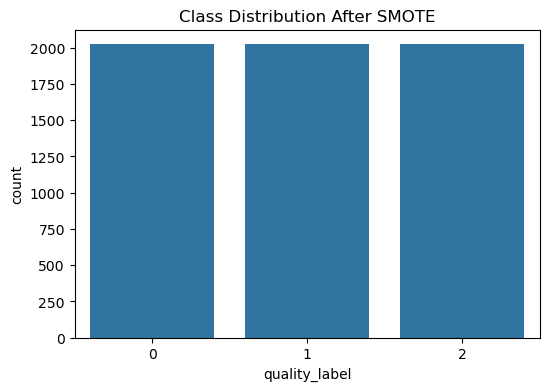

C:\Users\janin\AppData\Local\Temp\ipykernel_27676\1917778378.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


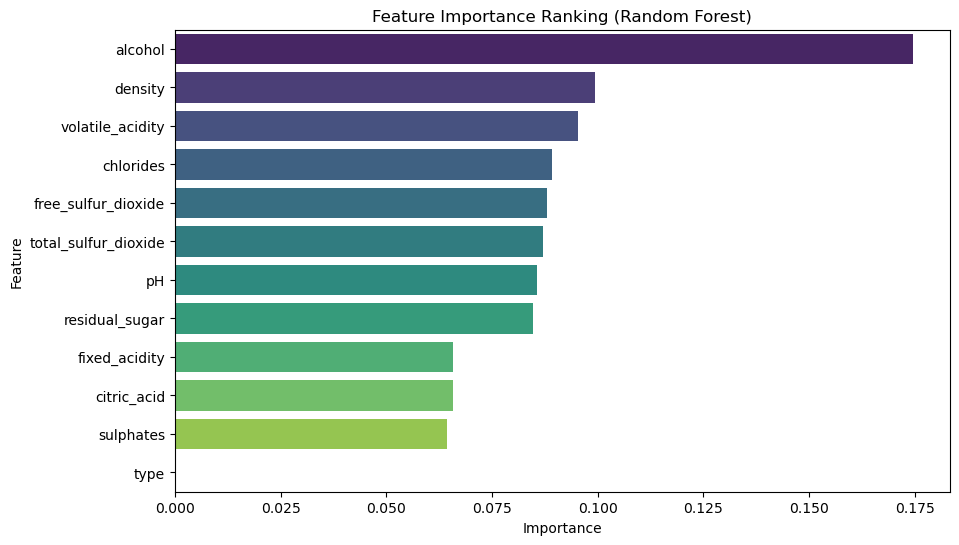

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# Step 2: Feature Selection using RandomForest for initial feature ranking
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)

# Rank feature importance
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for RandomForest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance Ranking (Random Forest)')
plt.show()

# Step 3: Standardization
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Step 4: Hyperparameter Tuning and Model Training

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize models
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'SVM': (SVC(random_state=42), param_grid_svc),
    'ANN': (MLPClassifier(random_state=42), param_grid_ann)
}

# Tune and evaluate each model using GridSearchCV
best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_resampled_scaled, y_train_resampled)
    best_models[model_name] = grid_search


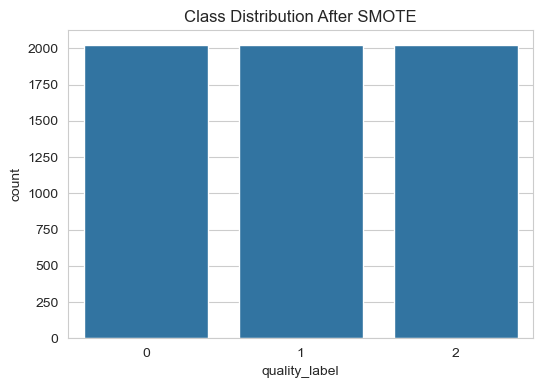

Tuning LogisticRegression...
LogisticRegression Best Accuracy: 0.4877
Best Parameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.51      0.67      0.58       230
           1       0.74      0.40      0.52       506
           2       0.11      0.60      0.18        35

    accuracy                           0.49       771
   macro avg       0.45      0.56      0.43       771
weighted avg       0.64      0.49      0.52       771

Confusion Matrix for LogisticRegression:
 [[154  65  11]
 [142 201 163]
 [  8   6  21]]
Tuning KNN...
KNN Best Accuracy: 0.6667
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.62      0.69      0.65       230
           1       0.81      0.67      0.73       506
   

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# Step 2: Feature Selection using RandomForest for initial feature ranking
# Since we are focusing on different models, we will skip the RandomForest step here.

# Step 3: Standardization
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Step 4: Hyperparameter Tuning and Model Training

# Define parameter grids for each new model
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_gbc = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10]
}

# Initialize the new models
models = {
    'LogisticRegression': (LogisticRegression(random_state=42), param_grid_lr),
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'GradientBoosting': (GradientBoostingClassifier(random_state=42), param_grid_gbc)
}

# Tune and evaluate each model using GridSearchCV
best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_resampled_scaled, y_train_resampled)
    best_models[model_name] = grid_search
    
    # Evaluate the model on test data
    y_pred = grid_search.best_estimator_.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"{model_name} Best Accuracy: {accuracy:.4f}")
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Classification Report for {model_name}:\n {classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {model_name}:\n {confusion_matrix(y_test, y_pred)}")

# Step 5: Visualize results or choose the best performing model based on evaluation


In [18]:
# Tune and evaluate each model using GridSearchCV
best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")  # Make sure this f-string is properly closed
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_resampled_scaled, y_train_resampled)
    best_models[model_name] = grid_search

    # Evaluate the model on test data
    y_pred = grid_search.best_estimator_.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"{model_name} Best Accuracy: {accuracy:.4f}")  # This line is now correctly formatted
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")  # No unterminated f-string here
    print(f"Classification Report for {model_name}:\n {classification_report(y_test, y_pred)}")  # Ensure the newline is correct
    print(f"Confusion Matrix for {model_name}:\n {confusion_matrix(y_test, y_pred)}")  # Fixed f-string


Tuning RandomForest...
RandomForest Best Accuracy: 0.7354
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       230
           1       0.82      0.77      0.80       506
           2       0.33      0.49      0.39        35

    accuracy                           0.74       771
   macro avg       0.60      0.65      0.62       771
weighted avg       0.75      0.74      0.74       771

Confusion Matrix for RandomForest:
 [[160  67   3]
 [ 84 390  32]
 [  0  18  17]]
Tuning SVM...
SVM Best Accuracy: 0.5318
Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.55      0.70      0.62       230
           1       0.78      0.45      0.57       506
           2